In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skewnorm
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn import metrics
%matplotlib inline

# Input the H1N1 Dataset

In [2]:
df = pd.read_csv("./CPI_Clean/CPI_Food_H1N1_updated.csv")
df

,date,CPI,EX_IM,breakfast,meat,dairy,fruits,food_total,Housing,apparel,transport,medical,recreation,education,others,cost_of_living
0,April 2009,0.0,0.80,252.709,205.699,197.124,274.297,929.829,217.126,123.208,171.987,374.170,114.625,126.273,370.606,1497.995
1,May 2009,0.1,1.05,252.714,203.789,196.055,274.006,926.564,216.971,121.751,175.997,375.026,114.264,126.467,369.901,1500.377
2,June 2009,0.7,1.85,253.008,204.031,197.197,272.608,926.844,218.071,118.799,183.735,375.093,114.643,126.519,370.595,1507.455
3,July 2009,0.0,-0.45,253.391,201.743,193.118,270.940,919.192,218.085,115.620,182.798,375.739,114.619,126.914,372.894,1506.669
4,August 2009,0.4,1.05,252.382,202.911,192.381,267.309,914.983,217.827,117.130,184.386,376.537,114.755,128.128,372.699,1511.462
5,September 2009,0.2,0.00,251.231,201.755,193.353,267.609,913.948,217.178,122.476,183.932,377.727,114.629,129.035,374.219,1519.196
6,October 2009,0.3,0.45,251.421,200.597,195.360,269.467,916.845,216.612,123.998,185.362,378.552,114.157,129.128,375.444,1523.253
7,November 2009,0.4,1.25,250.600,201.202,193.914,269.832,915.548,215.808,122.465,188.587,379.575,113.820,128.845,376.702,1525.802
8,December 2009,0.1,0.30,251.019,201.003,194.792,273.189,920.003,215.523,119.357,188.318,379.516,113.212,128.883,377.330,1522.139
9,January 2010,0.2,1.00,250.725,201.870,198.949,279.119,930.663,215.925,116.678,190.512,382.688,113.310,129.072,377.652,1525.837


In [3]:
#take the subset of the data
df = df.drop(['date', 'food_total', 'Housing', 'apparel', 'transport', 'medical', 'recreation', 'education', 'others'], axis=1)
df

,CPI,EX_IM,breakfast,meat,dairy,fruits,cost_of_living
0,0.0,0.80,252.709,205.699,197.124,274.297,1497.995
1,0.1,1.05,252.714,203.789,196.055,274.006,1500.377
2,0.7,1.85,253.008,204.031,197.197,272.608,1507.455
3,0.0,-0.45,253.391,201.743,193.118,270.940,1506.669
4,0.4,1.05,252.382,202.911,192.381,267.309,1511.462
5,0.2,0.00,251.231,201.755,193.353,267.609,1519.196
6,0.3,0.45,251.421,200.597,195.360,269.467,1523.253
7,0.4,1.25,250.600,201.202,193.914,269.832,1525.802
8,0.1,0.30,251.019,201.003,194.792,273.189,1522.139
9,0.2,1.00,250.725,201.870,198.949,279.119,1525.837


# EDA for H1N1 dataset

In [4]:
summary = df.describe()
summary

,CPI,EX_IM,breakfast,meat,dairy,fruits,cost_of_living
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,0.158824,0.491176,251.373706,203.919176,196.503765,272.630412,1524.500765
std,0.226547,0.718991,1.089119,2.753198,2.268422,4.672920,15.365860
min,-0.200000,-1.000000,249.736000,200.597000,192.381000,265.914000,1497.995000
25%,0.000000,-0.050000,250.600000,201.755000,194.792000,269.467000,1511.462000
50%,0.100000,0.550000,251.231000,202.911000,197.197000,272.608000,1525.802000
75%,0.300000,1.050000,252.382000,205.679000,198.712000,274.963000,1539.782000
max,0.700000,1.850000,253.391000,208.989000,198.991000,280.431000,1543.369000


In [5]:
correlation = df.corr()
correlation

,CPI,EX_IM,breakfast,meat,dairy,fruits,cost_of_living
CPI,1.000000,0.617315,0.132554,-0.157137,-0.210906,-0.507895,-0.279551
EX_IM,0.617315,1.000000,0.215220,-0.203605,-0.065378,0.127720,-0.341802
breakfast,0.132554,0.215220,1.000000,-0.378946,-0.464655,0.037482,-0.881528
meat,-0.157137,-0.203605,-0.378946,1.000000,0.571129,-0.188591,0.422153
dairy,-0.210906,-0.065378,-0.464655,0.571129,1.000000,0.427324,0.544319
fruits,-0.507895,0.127720,0.037482,-0.188591,0.427324,1.000000,0.130196
cost_of_living,-0.279551,-0.341802,-0.881528,0.422153,0.544319,0.130196,1.000000


From the table, we can see that for:

Breakfast
- export-import has the highest positive correlation 
- cost of living has the highest negative correlation 

Meat
- cost of living has the highest positive correlation
- export-import has the highest negative correlation

Dairy
- cost of living has the highest positive correlation
- CPI has the highest negative correlation

Fruits
- cost of living has the highest positive correlation
- CPI has the highest negative correlation

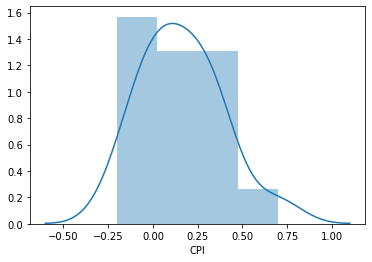

In [6]:
#see CPI distribution
sns.distplot(df['CPI'], kde=True)

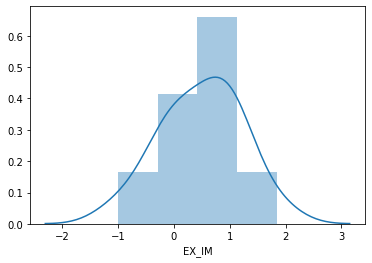

In [7]:
#see export-import distribution
sns.distplot(df['EX_IM'], kde=True)

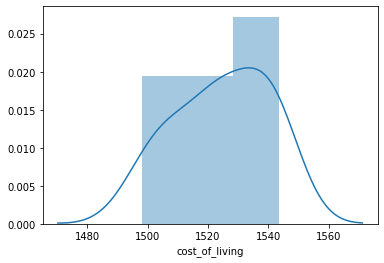

In [8]:
#see cost of living distribution
sns.distplot(df['cost_of_living'], kde=True)

As we can see above that the three datasets have approximately normal distribution 

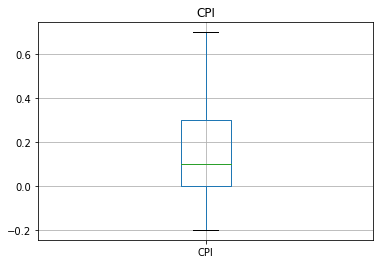

In [9]:
#looking for outlier in CPI
df.boxplot("CPI")
title = plt.title("CPI")

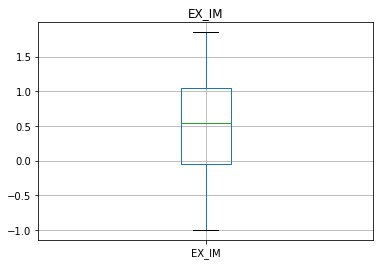

In [10]:
#looking for outlier in export-import
df.boxplot("EX_IM")
title = plt.title("EX_IM")

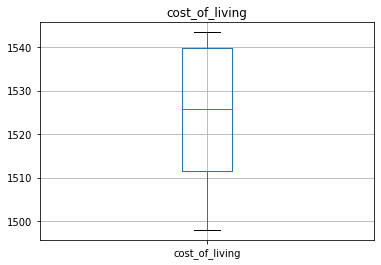

In [11]:
#looking for outlier in cost of living
df.boxplot("cost_of_living")
title = plt.title("cost_of_living")

As we can see above these three datasets do not have any outlier

# Analyzing H1N1 datasets 

## Creating model using linear regression

In [12]:
#divide dataet into training dataset and test dataset
#80% training datsets
df_training = df.loc[0:13,:]
df_training

,CPI,EX_IM,breakfast,meat,dairy,fruits,cost_of_living
0,0.0,0.80,252.709,205.699,197.124,274.297,1497.995
1,0.1,1.05,252.714,203.789,196.055,274.006,1500.377
2,0.7,1.85,253.008,204.031,197.197,272.608,1507.455
3,0.0,-0.45,253.391,201.743,193.118,270.940,1506.669
4,0.4,1.05,252.382,202.911,192.381,267.309,1511.462
5,0.2,0.00,251.231,201.755,193.353,267.609,1519.196
6,0.3,0.45,251.421,200.597,195.360,269.467,1523.253
7,0.4,1.25,250.600,201.202,193.914,269.832,1525.802
8,0.1,0.30,251.019,201.003,194.792,273.189,1522.139
9,0.2,1.00,250.725,201.870,198.949,279.119,1525.837


In [13]:
#20% data test
df_test = df.loc[14:,:]
df_test

,CPI,EX_IM,breakfast,meat,dairy,fruits,cost_of_living
14,-0.1,-1.00,250.260,208.171,197.947,271.907,1539.938
15,0.3,-0.05,250.172,208.989,198.991,265.967,1539.782
16,0.3,0.70,249.736,208.854,198.712,265.914,1543.369


In [14]:
#predict for breakfast
outcome_b, predictors_b = patsy.dmatrices('breakfast ~ CPI + EX_IM + cost_of_living ', df_training)
mod_b = sm.OLS(outcome_b, predictors_b)
res_b = mod_b.fit()
print(res_b.summary())

                            OLS Regression Results                            
Dep. Variable:              breakfast   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     8.716
Date:                Tue, 02 Jun 2020   Prob (F-statistic):            0.00385
Time:                        21:57:22   Log-Likelihood:                -10.074
No. Observations:                  14   AIC:                             28.15
Df Residuals:                      10   BIC:                             30.71
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        340.8113     18.327     18.

From here, we can see that export-import has the largest effect towards breakfast. Holding CPI and cost of living constant, 1% change in export import leads to 0.2406 change to breakfast

breakfast linear regression equation

breakfast 340.8113 + (-0.0217) * (CPI) + (-0.2406) * (EX_IM) + (-0.0585) * (cost_of_living)

In [15]:
df_test

,CPI,EX_IM,breakfast,meat,dairy,fruits,cost_of_living
14,-0.1,-1.00,250.260,208.171,197.947,271.907,1539.938
15,0.3,-0.05,250.172,208.989,198.991,265.967,1539.782
16,0.3,0.70,249.736,208.854,198.712,265.914,1543.369


In [16]:
#test model with test dataset (the rest 20% of h1n1 data)
breakfast = 340.8113 + (-0.0217)*df_test['CPI'] + (-0.2406)*df_test['EX_IM'] + (-0.0585)*df_test['cost_of_living']
breakfast

14    250.967697
15    250.739573
16    250.349284
dtype: float64

In [17]:
#model % error
bfast_err = (breakfast - df_test['breakfast']) / breakfast 
bfast_err = bfast_err * 100

#model % accuracy
bfast_acc = 100 - bfast_err
bfast_acc

14    99.718013
15    99.773640
16    99.755029
dtype: float64

In [18]:
#predict for meat
outcome_m, predictors_m = patsy.dmatrices('meat ~ CPI + EX_IM + cost_of_living', df_training)
mod_m = sm.OLS(outcome_m, predictors_m)
res_m = mod_m.fit()
print(res_m.summary())

                            OLS Regression Results                            
Dep. Variable:                   meat   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     3.894
Date:                Tue, 02 Jun 2020   Prob (F-statistic):             0.0443
Time:                        21:57:22   Log-Likelihood:                -21.553
No. Observations:                  14   AIC:                             51.11
Df Residuals:                      10   BIC:                             53.66
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        234.9577     41.606      5.

From here, we can see that CPI has the largest effect towards meat. Holding export-import and cost of living constant, 1% change in CPI leads to 6.9990 change to meat

meat linear regression equation
meat = 234.9577 + (-6.9990) * (CPI) + 2.1568 * (EX_IM) + (-0.0212) * (cost_of_living)

In [19]:
df_test

,CPI,EX_IM,breakfast,meat,dairy,fruits,cost_of_living
14,-0.1,-1.00,250.260,208.171,197.947,271.907,1539.938
15,0.3,-0.05,250.172,208.989,198.991,265.967,1539.782
16,0.3,0.70,249.736,208.854,198.712,265.914,1543.369


In [20]:
#test model with test dataset (the rest 20% of h1n1 data)
meat = 234.9577 + (-6.9990)*df_test['CPI'] + 2.1568*df_test['EX_IM'] + (-0.0212)*df_test['cost_of_living']
meat

14    200.854114
15    200.106782
16    201.648337
dtype: float64

In [21]:
#model % error
meat_err = abs((meat - df_test['meat']))/ meat 
meat_err = meat_err * 100
meat_err

#model % accuracy
meat_acc = 100 - meat_err
meat_acc

14    96.357114
15    95.561261
16    96.426619
dtype: float64

In [22]:
#predict for dairy
outcome_d, predictors_d = patsy.dmatrices('dairy ~ CPI + EX_IM + cost_of_living', df_training)
mod_d = sm.OLS(outcome_d, predictors_d)
res_d = mod_d.fit()
print(res_d.summary())

                            OLS Regression Results                            
Dep. Variable:                  dairy   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     1.760
Date:                Tue, 02 Jun 2020   Prob (F-statistic):              0.218
Time:                        21:57:22   Log-Likelihood:                -27.804
No. Observations:                  14   AIC:                             63.61
Df Residuals:                      10   BIC:                             66.17
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        114.3215     65.027      1.

From here, we can see that CPI has the largest effect towards dairy. Holding export-import and cost of living constant, 1% change in CPI leads to 4.7300 change to dairy

dairy linear regression equation
dairy = 114.3215 + (-4.7300) * (CPI) + 1.7494 * (EX_IM) + (0.0535) * (cost_of_living)

In [23]:
df_test

,CPI,EX_IM,breakfast,meat,dairy,fruits,cost_of_living
14,-0.1,-1.00,250.260,208.171,197.947,271.907,1539.938
15,0.3,-0.05,250.172,208.989,198.991,265.967,1539.782
16,0.3,0.70,249.736,208.854,198.712,265.914,1543.369


In [24]:
#test model with test dataset (the rest 20% of h1n1 data)
dairy = 114.3215 + (-4.7300)*df_test['CPI'] + 1.7494*df_test['EX_IM'] + (0.0535)*df_test['cost_of_living']
dairy

14    195.431783
15    195.193367
16    196.697321
dtype: float64

In [25]:
#model % error
dairy_err = abs((dairy - df_test['dairy']))/ dairy 
dairy_err = dairy_err * 100
dairy_err

#model % accuracy
dairy_acc = 100 - dairy_err
dairy_acc

14    98.712995
15    98.054425
16    98.975747
dtype: float64

In [26]:
#predict for fruits
outcome_f, predictors_f = patsy.dmatrices('fruits ~ CPI + EX_IM + cost_of_living', df_training)
mod_f = sm.OLS(outcome_f, predictors_f)
res_f = mod_f.fit()
print(res_f.summary())

                            OLS Regression Results                            
Dep. Variable:                 fruits   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     5.995
Date:                Tue, 02 Jun 2020   Prob (F-statistic):             0.0132
Time:                        21:57:22   Log-Likelihood:                -32.701
No. Observations:                  14   AIC:                             73.40
Df Residuals:                      10   BIC:                             75.96
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        102.5107     92.256      1.

From here, we can see that CPI has the largest effect towards fruits. Holding export-import and cost of living constant, 1% change in CPI leads to 14.6505 change to fruits

fruits linear regression equation
fruits = 102.5107 + (-14.6505) * (CPI) + 4.2719 * (EX_IM) + 0.1123 * (cost_of_living)

In [27]:
df_test

,CPI,EX_IM,breakfast,meat,dairy,fruits,cost_of_living
14,-0.1,-1.00,250.260,208.171,197.947,271.907,1539.938
15,0.3,-0.05,250.172,208.989,198.991,265.967,1539.782
16,0.3,0.70,249.736,208.854,198.712,265.914,1543.369


In [28]:
#test model with test dataset (the rest 20% of h1n1 data)
fruits = 102.5107 + (-14.6505)*df_test['CPI'] + 4.2719*df_test['EX_IM'] + 0.1123*df_test['cost_of_living']
fruits

14    272.638887
15    270.819474
16    274.426219
dtype: float64

In [29]:
#model % error
fruits_err = abs((fruits - df_test['fruits']))/ fruits
fruits_err = fruits_err * 100
fruits_err

#model % accuracy
fruits_acc = 100 - fruits_err
fruits_acc

14    99.731554
15    98.208226
16    96.898176
dtype: float64

## Prediction with linear regression

In [30]:
#La dataframe
LA_df = pd.read_csv("./CPI_Clean/LA_CPI_TRANSPOSED.csv")
LA_df

,Unnamed: 0,All items,Food and beverages,Cereals and bakery products,"Meats, poultry, fish, and eggs",Dairy and related products,Fruits and vegetables,Housing,Apparel,Transportation,Medical care,Recreation,Education and communication,Other goods and services
0,IDX-DEC-2019,275.553000,267.623000,271.514000,281.643000,253.042000,342.395000,319.257000,106.453000,213.991000,485.696000,105.9120,149.031000,447.306000
1,IDX-JAN-2020,277.755000,271.402000,273.713000,283.279000,255.915000,346.423000,320.216000,112.147000,214.517000,498.270000,107.7440,149.118000,449.830000
2,IDX-FEB-2020,278.657000,272.546000,276.386000,279.993000,254.288000,352.276000,321.211000,114.583000,214.885000,499.208000,108.7570,149.002000,446.751000
3,IDX-MAR-2020,276.589000,271.669000,271.720000,283.766000,250.076000,348.884000,321.162000,109.624000,206.780000,500.341000,107.7760,148.729000,445.003000
4,IDX-APR-2020,275.853000,276.101000,284.534000,288.203000,260.443000,348.901000,322.624000,103.359000,196.441000,499.720000,108.3170,149.159000,450.417000
5,Inflation Change JAN->MAR,-0.419794,0.098378,-0.728135,0.171915,-2.281617,0.710403,0.295426,-2.249726,-3.606707,0.415638,0.0297,-0.260867,-1.073072


In [31]:
#Cut index number 5 row
LA_df = LA_df.loc[0:4, :]
#Add CPI of each months
LA_df['CPI'] = [1.1, 0.3, -1.0, -0.3, 0.7]
#Add export-import
LA_df['EX_IM'] = [0, 0.4,-0.95, -2.05, -2.95 ]
LA_df

,Unnamed: 0,All items,Food and beverages,Cereals and bakery products,"Meats, poultry, fish, and eggs",Dairy and related products,Fruits and vegetables,Housing,Apparel,Transportation,Medical care,Recreation,Education and communication,Other goods and services,CPI,EX_IM
0,IDX-DEC-2019,275.553,267.623,271.514,281.643,253.042,342.395,319.257,106.453,213.991,485.696,105.912,149.031,447.306,1.1,0.00
1,IDX-JAN-2020,277.755,271.402,273.713,283.279,255.915,346.423,320.216,112.147,214.517,498.270,107.744,149.118,449.830,0.3,0.40
2,IDX-FEB-2020,278.657,272.546,276.386,279.993,254.288,352.276,321.211,114.583,214.885,499.208,108.757,149.002,446.751,-1.0,-0.95
3,IDX-MAR-2020,276.589,271.669,271.720,283.766,250.076,348.884,321.162,109.624,206.780,500.341,107.776,148.729,445.003,-0.3,-2.05
4,IDX-APR-2020,275.853,276.101,284.534,288.203,260.443,348.901,322.624,103.359,196.441,499.720,108.317,149.159,450.417,0.7,-2.95


In [32]:
#predict LA cereal and bakery product price
LA_breakfast = 340.8113 + (-0.0217)*LA_df['CPI'] + (-0.2406)*LA_df['EX_IM'] + (-0.0585)*LA_df['All items']
LA_breakfast

0    324.667580
1    324.459882
2    324.760136
3    325.130584
4    325.368479
dtype: float64

In [33]:
#actual data % error
LA_bfast_err = abs((LA_breakfast - LA_df['Cereals and bakery products']))/ LA_breakfast 
LA_bfast_err = LA_bfast_err * 100
LA_bfast_err

#model % accuracy
LA_bfast_acc = 100 - LA_bfast_err
LA_bfast_acc

0    83.628307
1    84.359582
2    85.104657
3    83.572575
4    87.449774
dtype: float64

In [34]:
#predict LA meat price
LA_meat = 234.9577 + (-6.9990)*LA_df['CPI'] + 2.1568*LA_df['EX_IM'] + (-0.0212)*LA_df['All items']
LA_meat

0    221.417076
1    227.832314
2    234.000212
3    226.772273
4    217.847756
dtype: float64

In [35]:
#actual data % error
LA_meat_err = abs((LA_meat - LA_df['Meats, poultry, fish, and eggs']))/ LA_meat 
LA_meat_err = LA_meat_err * 100
LA_meat_err

#model % accuracy
LA_bfast_acc = 100 - LA_bfast_err
LA_bfast_acc

0    83.628307
1    84.359582
2    85.104657
3    83.572575
4    87.449774
dtype: float64

In [36]:
#predict LA dairy price
LA_dairy = 114.3215 + (-4.7300)*LA_df['CPI'] + 1.7494*LA_df['EX_IM'] + (0.0535)*LA_df['All items']
LA_dairy

0    123.860585
1    128.462153
2    132.297719
3    126.951741
4    120.607906
dtype: float64

In [37]:
#actual data % error
LA_dairy_err = abs((LA_dairy - LA_df['Dairy and related products']))/ LA_dairy
LA_dairy_err = LA_dairy_err * 100
LA_dairy_err

#model % accuracy
LA_dairy_acc = 100 - LA_dairy_err
LA_dairy_acc

0    -4.295821
1     0.785683
2     7.791093
3     3.014912
4   -15.941898
dtype: float64

The model is not good to predict the dairy, this might happens because:

- we assume that the model to be linear, but maybe it is not linear.
- do not have high correlation, so we failed to predict

In [38]:
#Predict LA fruits and vegetable price
LA_fruits = 102.5107 + (-14.6505)*LA_df['CPI'] + 4.2719*LA_df['EX_IM'] + 0.1123*LA_df['All items']
LA_fruits

0    117.339752
1    131.016197
2    144.396076
3    129.209400
4    110.631537
dtype: float64

In [39]:
#actual data % error
LA_fruits_err = abs((LA_fruits - LA_df['Fruits and vegetables']))/ LA_fruits
LA_fruits_err = LA_fruits_err * 100
LA_fruits_err

#model % accuracy
LA_fruits_acc = 100 - LA_fruits_err
LA_fruits_acc

0    -91.797958
1    -64.412347
2    -43.965078
3    -70.014411
4   -115.372099
dtype: float64

The model is not good to predict the fruits and vegetable, this might happens because:

- we assume that the model to be linear, but maybe it is not linear.
- do not have high correlation, so we failed to predict

In [40]:
#San Francisco dataframe
SF_df = pd.read_csv("./CPI_Clean/SF_CPI_TRANSPOSED.csv")
SF_df

,Unnamed: 0,All items,Food and beverages,Cereals and bakery products,"Meats, poultry, fish, and eggs",Dairy and related products,Fruits and vegetables,Housing,Apparel,Transportation,Medical care,Recreation,Education and communication,Other goods and services
0,IDX-OCT-2019,298.443000,292.658000,264.788000,254.853000,273.959000,347.437000,350.894000,112.876000,216.519000,551.902000,118.162000,150.24400,506.865000
1,IDX-DEC-2019,297.007000,291.161000,261.685000,257.727000,272.909000,339.390000,352.601000,105.638000,205.815000,554.645000,120.285000,150.73800,502.634000
2,IDX-FEB-2020,299.690000,294.897000,260.713000,259.584000,276.983000,337.537000,355.875000,118.319000,207.576000,545.970000,119.462000,150.91600,506.920000
3,IDX-APR-2020,298.074000,299.485000,271.507000,286.649000,286.772000,350.323000,356.770000,103.168000,194.267000,548.136000,119.902000,151.60300,511.625000
4,Inflation Change FEB->APR,-0.539224,1.555797,4.140185,10.426297,3.534152,3.788029,0.251493,-12.805213,-6.411628,0.396725,0.368318,0.45522,0.928154


In [41]:
#Cut index number 4 row
SF_df = SF_df.loc[0:3, :]
#Add CPI of each months
SF_df['CPI'] = [-0.5 ,2.5 ,-0.5 ,1.1]
#Add export-import
SF_df['EX_IM'] = [-0.2, 0, -0.95, -2.95]
SF_df

,Unnamed: 0,All items,Food and beverages,Cereals and bakery products,"Meats, poultry, fish, and eggs",Dairy and related products,Fruits and vegetables,Housing,Apparel,Transportation,Medical care,Recreation,Education and communication,Other goods and services,CPI,EX_IM
0,IDX-OCT-2019,298.443,292.658,264.788,254.853,273.959,347.437,350.894,112.876,216.519,551.902,118.162,150.244,506.865,-0.5,-0.20
1,IDX-DEC-2019,297.007,291.161,261.685,257.727,272.909,339.390,352.601,105.638,205.815,554.645,120.285,150.738,502.634,2.5,0.00
2,IDX-FEB-2020,299.690,294.897,260.713,259.584,276.983,337.537,355.875,118.319,207.576,545.970,119.462,150.916,506.920,-0.5,-0.95
3,IDX-APR-2020,298.074,299.485,271.507,286.649,286.772,350.323,356.770,103.168,194.267,548.136,119.902,151.603,511.625,1.1,-2.95


In [42]:
#predict SF cereal and bakery product price
SF_breakfast = 340.8113 + (-0.0217)*SF_df['CPI'] + (-0.2406)*SF_df['EX_IM'] + (-0.0585)*SF_df['All items']
SF_breakfast

0    323.411355
1    323.382140
2    323.518855
3    324.059871
dtype: float64

In [43]:
#actual data % error
SF_bfast_err = abs((SF_breakfast - SF_df['Cereals and bakery products']))/ SF_breakfast 
SF_bfast_err = SF_bfast_err * 100
SF_bfast_err

#model % accuracy
SF_bfast_acc = 100 - SF_bfast_err
SF_bfast_acc

0    81.873440
1    80.921290
2    80.586648
3    83.782975
dtype: float64

In [44]:
#predict SF meat price
SF_meat = 234.9577 + (-6.9990)*SF_df['CPI'] + 2.1568*SF_df['EX_IM'] + (-0.0212)*SF_df['All items']
SF_meat

0    231.698848
1    211.163652
2    230.054812
3    214.577071
dtype: float64

In [45]:
#actual data % error
SF_meat_err = abs((SF_meat - SF_df['Meats, poultry, fish, and eggs']))/ SF_meat 
SF_meat_err = SF_meat_err * 100
SF_meat_err

#model % accuracy
SF_bfast_acc = 100 - SF_bfast_err
SF_bfast_acc

0    81.873440
1    80.921290
2    80.586648
3    83.782975
dtype: float64

In [46]:
#predict SF dairy price
SF_dairy = 114.3215 + (-4.7300)*SF_df['CPI'] + 1.7494*SF_df['EX_IM'] + (0.0535)*SF_df['All items']
SF_dairy

0    132.303320
1    118.386375
2    131.057985
3    119.904729
dtype: float64

As we see in the dataframe above, the model is failed to predict the dairy and fruits and vegetable price due to the dramatic price increase

In [47]:
#Riverside dataframe
RS_df = pd.read_csv("./CPI_Clean/RS_CPI_TRANSPOSED.csv")
RS_df

,Unnamed: 0,All items,Food and beverages,Cereals and bakery products,"Meats, poultry, fish, and eggs",Dairy and related products,Fruits and vegetables,Housing,Apparel,Transportation,Medical care,Recreation,Education and communication,Other goods and services
0,IDX-SEP-2019,106.412000,104.565000,104.417000,101.027000,100.287000,101.854000,107.048000,106.51000,108.799000,104.586000,101.354000,105.604000,105.500000
1,IDX-NOV-2019,106.573000,103.959000,104.712000,100.074000,105.255000,100.967000,107.678000,89.98900,111.540000,104.906000,101.749000,104.536000,106.336000
2,IDX-JAN-2020,107.143000,106.468000,104.874000,101.213000,105.764000,104.337000,109.886000,93.44200,106.672000,105.768000,99.300000,104.746000,107.738000
3,IDX-MAR-2020,107.162000,106.700000,106.098000,103.272000,105.285000,104.932000,109.955000,97.44200,103.961000,107.539000,101.545000,105.182000,108.452000
4,Inflation Change JAN->MAR,0.017733,0.217906,1.167115,2.034324,-0.452895,0.570267,0.062792,4.28073,-2.541435,1.674419,2.260826,0.416245,0.662719


In [48]:
#Cut index number 4 row
RS_df = RS_df.loc[0:3, :]
#Add CPI of each months
RS_df['CPI'] = ['NA', 'NA',0.0 ,'NA']
#Add export-import
RS_df['EX_IM'] = [-0.1, 0.15, 0.4, -2.05]
RS_df

,Unnamed: 0,All items,Food and beverages,Cereals and bakery products,"Meats, poultry, fish, and eggs",Dairy and related products,Fruits and vegetables,Housing,Apparel,Transportation,Medical care,Recreation,Education and communication,Other goods and services,CPI,EX_IM
0,IDX-SEP-2019,106.412,104.565,104.417,101.027,100.287,101.854,107.048,106.510,108.799,104.586,101.354,105.604,105.500,NA,-0.10
1,IDX-NOV-2019,106.573,103.959,104.712,100.074,105.255,100.967,107.678,89.989,111.540,104.906,101.749,104.536,106.336,NA,0.15
2,IDX-JAN-2020,107.143,106.468,104.874,101.213,105.764,104.337,109.886,93.442,106.672,105.768,99.300,104.746,107.738,0,0.40
3,IDX-MAR-2020,107.162,106.700,106.098,103.272,105.285,104.932,109.955,97.442,103.961,107.539,101.545,105.182,108.452,NA,-2.05


Model failed to predict the prices in Riverside due to lack of data in CPI for September, November, March

In [49]:
#San Diego daframe
SD_df = pd.read_csv("./CPI_Clean/SD_CPI_TRANSPOSED.csv")
SD_df

,Unnamed: 0,All items,Food and beverages,Cereals and bakery products,"Meats, poultry, fish, and eggs",Dairy and related products,Fruits and vegetables,Housing,Apparel,Transportation,Medical care,Recreation,Education and communication,Other goods and services
0,IDX-SEP-2019,301.033000,261.023000,260.394000,237.007000,190.050000,269.633000,357.699000,171.134000,234.106000,494.78900,156.400000,130.136000,405.354000
1,IDX-NOV-2019,301.520000,263.074000,264.756000,240.881000,193.319000,268.477000,357.465000,161.566000,235.748000,496.26400,158.427000,130.967000,410.688000
2,IDX-JAN-2020,302.564000,262.528000,260.540000,239.904000,193.408000,260.880000,361.568000,161.111000,231.819000,498.96200,159.728000,130.384000,411.720000
3,IDX-MAR-2020,302.589000,265.155000,256.531000,240.900000,194.576000,264.063000,363.301000,157.971000,223.714000,507.90400,161.577000,129.186000,414.683000
4,Inflation Change JAN->MAR,0.008263,1.000655,-1.538727,0.415166,0.603905,1.220101,0.479301,-1.948967,-3.496262,1.79212,1.157593,-0.918824,0.719664


In [50]:
#Cut index number 4 row
SD_df = SD_df.loc[0:3, :]
#Add CPI of each months
SD_df['CPI'] = [0.2, 0.3, 0.0 , 1.8]
#Add export-import
SD_df['EX_IM'] = [-0.1, 0.15, 0.4, -2.05]
SD_df

,Unnamed: 0,All items,Food and beverages,Cereals and bakery products,"Meats, poultry, fish, and eggs",Dairy and related products,Fruits and vegetables,Housing,Apparel,Transportation,Medical care,Recreation,Education and communication,Other goods and services,CPI,EX_IM
0,IDX-SEP-2019,301.033,261.023,260.394,237.007,190.050,269.633,357.699,171.134,234.106,494.789,156.400,130.136,405.354,0.2,-0.10
1,IDX-NOV-2019,301.520,263.074,264.756,240.881,193.319,268.477,357.465,161.566,235.748,496.264,158.427,130.967,410.688,0.3,0.15
2,IDX-JAN-2020,302.564,262.528,260.540,239.904,193.408,260.880,361.568,161.111,231.819,498.962,159.728,130.384,411.720,0.0,0.40
3,IDX-MAR-2020,302.589,265.155,256.531,240.900,194.576,264.063,363.301,157.971,223.714,507.904,161.577,129.186,414.683,1.8,-2.05


In [51]:
#predict SD cereal and bakery product price
SD_breakfast = 340.8113 + (-0.0217)*SD_df['CPI'] + (-0.2406)*SD_df['EX_IM'] + (-0.0585)*SD_df['All items']
SD_breakfast

0    323.220590
1    323.129780
2    323.015066
3    323.564013
dtype: float64

In [52]:
#actual data % error
SD_bfast_err = abs((SD_breakfast - SD_df['Cereals and bakery products']))/ SD_breakfast 
SD_bfast_err = SD_bfast_err * 100
SD_bfast_err

#model % accuracy
SD_bfast_acc = 100 - SD_bfast_err
SD_bfast_acc

0    80.562318
1    81.934881
2    80.658776
3    79.282921
dtype: float64

In [53]:
#predict SD meat price
SD_meat = 234.9577 + (-6.9990)*SD_df['CPI'] + 2.1568*SD_df['EX_IM'] + (-0.0212)*SD_df['All items']
SD_meat

0    226.960320
1    226.789296
2    229.406063
3    211.523173
dtype: float64

In [54]:
#actual data % error
SD_meat_err = abs((SD_meat - SD_df['Meats, poultry, fish, and eggs']))/ SD_meat 
SD_meat_err = SD_meat_err * 100
SD_meat_err

#model % accuracy
SD_bfast_acc = 100 - SD_bfast_err
SD_bfast_acc

0    80.562318
1    81.934881
2    80.658776
3    79.282921
dtype: float64

As we see in the dataframe above, 
the model is failed to predict the dairy and fruits and vegetable price due to the dramatic price increase

## Create model using Machine Learning

In [55]:
#normalize the data
normalize = preprocessing.MinMaxScaler()
df_norm = normalize.fit_transform(df)

#convert into dataframe
df_norm = pd.DataFrame(df_norm, columns=df.columns)
df_norm

,CPI,EX_IM,breakfast,meat,dairy,fruits,cost_of_living
0,0.222222,0.631579,0.813406,0.607960,0.717549,0.577461,0.000000
1,0.333333,0.719298,0.814774,0.380362,0.555825,0.557415,0.052497
2,1.000000,1.000000,0.895212,0.409199,0.728593,0.461115,0.208489
3,0.222222,0.192982,1.000000,0.136559,0.111498,0.346215,0.191167
4,0.666667,0.719298,0.723940,0.275739,0.000000,0.096094,0.296800
5,0.444444,0.350877,0.409029,0.137989,0.147050,0.116760,0.467250
6,0.555556,0.508772,0.461012,0.000000,0.450681,0.244748,0.556662
7,0.666667,0.789474,0.236389,0.072092,0.231921,0.269890,0.612840
8,0.333333,0.456140,0.351026,0.048379,0.364750,0.501137,0.532111
9,0.444444,0.701754,0.270588,0.151692,0.993646,0.909623,0.613611


In [56]:
df_norm.describe()

,CPI,EX_IM,breakfast,meat,dairy,fruits,cost_of_living
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,0.398693,0.523220,0.448073,0.395874,0.623716,0.462658,0.584162
std,0.251719,0.252278,0.297980,0.328074,0.343180,0.321893,0.338649
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.236389,0.137989,0.364750,0.244748,0.296800
50%,0.333333,0.543860,0.409029,0.275739,0.728593,0.461115,0.612840
75%,0.555556,0.719298,0.723940,0.605577,0.957791,0.623338,0.920946
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
#upload validation data
df_validate = pd.read_csv("./CPI_Clean/NEW_ML.csv")
df_validate

#normalize the data
normalize = preprocessing.MinMaxScaler()
df_v_norm = normalize.fit_transform(df_validate)

#convert to dataframe
df_v_norm = pd.DataFrame(df_v_norm, columns=df_validate.columns)
df_v_norm

,CPI,EX_IM,Breakfast,Meat,Dairy,Fruits,Cost_of_living
0,1.000000,0.880597,0.000000,0.200974,0.286100,0.000000,0.000000
1,0.619048,1.000000,0.168894,0.400244,0.563229,0.407651,0.841123
2,0.000000,0.597015,0.374194,0.000000,0.406289,1.000000,1.000000
3,0.333333,0.268657,0.015822,0.459562,0.000000,0.656715,0.470786
4,0.809524,0.000000,1.000000,1.000000,1.000000,0.658435,0.963779


In [58]:
#set x predictors and y outcome
x_predictors = df_norm.drop(labels=['breakfast', 'meat', 'dairy', 'fruits'], axis=1)
y_outcome = df_norm.breakfast

x_validation = df_v_norm.drop(labels=['Breakfast', 'Meat', 'Dairy', 'Fruits'], axis=1)
y_validation = df_v_norm.Breakfast

#divide training and testing data
x_train, x_test, y_train, y_test = train_test_split(x_predictors, y_outcome, test_size=0.20)

#input machine learning model
model_1 = LinearRegression()
model_1.fit(x_train, y_train)
results_1 = model_1.predict(x_test)
results_1

array([0.4007445 , 0.51488674, 0.50640233, 0.9833485 ])

In [59]:
#test validation
kfold = model_selection.KFold(n_splits=2)
results_kfold = model_selection.cross_val_score(model_1, x_validation, y_validation, cv=kfold)
results_kfold.mean()

-0.5777421996615635

In [60]:
#print results
score = r2_score(y_test, results_1)
score

-0.9694606579785852

see test validation and r2 score, r2 score isn't close to 1 -> not that good, search google later

In [61]:
#make graph from y_test and result of x,y training
graph = pd.DataFrame({'actual result': y_test, 'predicted result': results_1})
graph

,actual result,predicted result
2,0.895212,0.400744
4,0.723940,0.514887
8,0.351026,0.506402
0,0.813406,0.983348


From the train and test dataframe, we have the model. From there we can see how close the predicted result to the actual result.

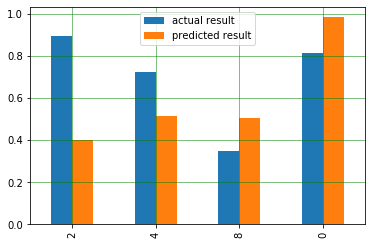

In [62]:
graph.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

From here we can see that the predicted results is quite good.

In [63]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, results_1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, results_1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, results_1)))

Mean Absolute Error: 0.2572097877789507
Mean Squared Error: 0.08530587367834656
Root Mean Squared Error: 0.29207169270291594


Our root mean square error is 0.192 which is lower than the mean value : 0.448073. Since we have mean square is pretty low, it indicates that we have a pretty good model to predict breakfast.